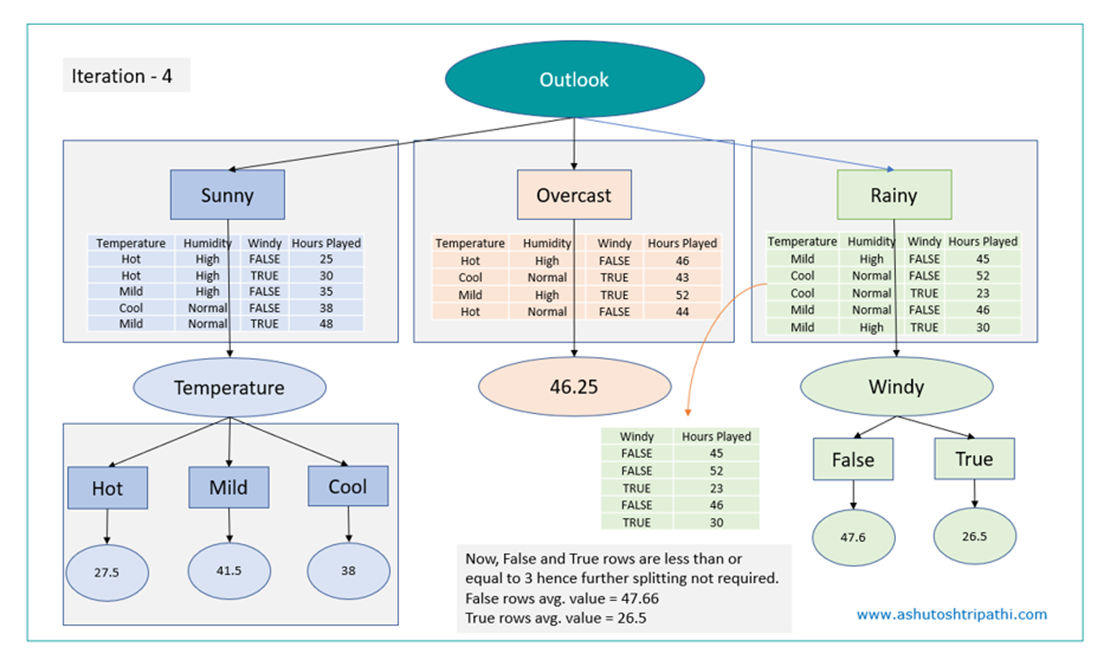

##  Read the 50startups dataset 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### Seperate x and y (profit)

In [5]:
x = df.drop(columns=['PROFIT'])
y = df[['PROFIT']]

In [6]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Seperate Cat and con for x 

In [8]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [9]:
cat

['STATE']

In [10]:
con

['RND', 'ADMIN', 'MKT']

### preprocession the data for x

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [13]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [14]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe, cat)]).set_output(transform='pandas')

In [15]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y,test_size=0.2,random_state=21)

In [17]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [18]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [19]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


In [20]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [21]:
xtrain.shape

(40, 6)

In [22]:
ytest.shape

(10, 1)

### Create the decision tree model 

In [23]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1, min_samples_split=3, min_samples_leaf=3, criterion='squared_error')
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=3, min_samples_split=3)

In [24]:
model.score(xtrain,ytrain)

0.6268054892550098

In [25]:
model.score(xtest,ytest)

0.6434222460818756

## Hyperparameter tuning 

In [26]:
params = {'max_depth' :[2,3,4,5,6,7,8,9,10,11],
          'min_samples_split' :[5,6,7,8,9,10],
          'min_samples_leaf' :[5,6,7,8,9,10],
          'criterion' : ['squared_error', 'absolute_error']}

In [27]:

from sklearn.model_selection import GridSearchCV
dtr  = DecisionTreeRegressor()
gscv  = GridSearchCV(dtr,param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [28]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [29]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=9)

### Evaluate model 

In [30]:
best_dtr.score(xtrain,ytrain)

0.9131514652386041

In [31]:
best_dtr.score(xtest,ytest)

0.8976448582018385

### predicting results for train and test 

In [32]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts = best_dtr.predict(xtest)

In [33]:
ypred_tr[0:5]

array([ 98803.38285714, 123931.412     , 123931.412     , 143975.94      ,
       109624.034     ])

In [34]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [35]:
ypred_ts[0:5]

array([174376.24166667,  52916.53166667,  52916.53166667,  98803.38285714,
       143975.94      ])

In [36]:
ytest.head()

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


## check mean squared error , mean abolute error and rmse,r2

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mse = mean_squared_error(ytest, ypred_ts)
mse

181654467.4510348

In [39]:
rmse = mse**(1/2)
rmse

13477.925190882861

In [40]:
mae = mean_absolute_error(ytest,ypred_ts)
mae

12461.10854761905

In [41]:
r2 = r2_score(ytest,ypred_ts)
r2

0.8976448582018385

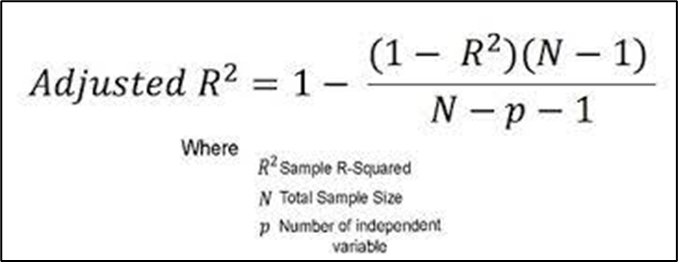

In [42]:
xtrain.shape

(40, 6)

In [43]:
xtrain.shape[0]

40

In [44]:
xtrain.shape[1]

6

In [45]:
def adj_r2(xtrain, ytrain, model):
    r2 = model.score(xtrain, ytrain)
    N = xtrain.shape[0]
    p = xtrain.shape[1]
    num = (1-r2)*(N-1)
    den = N-p-1
    r2a = 1 - (num/den)
    return r2a

In [46]:
adj_r2(xtrain,ytrain,best_dtr)

0.8973608225547139

## plot the decision tree 

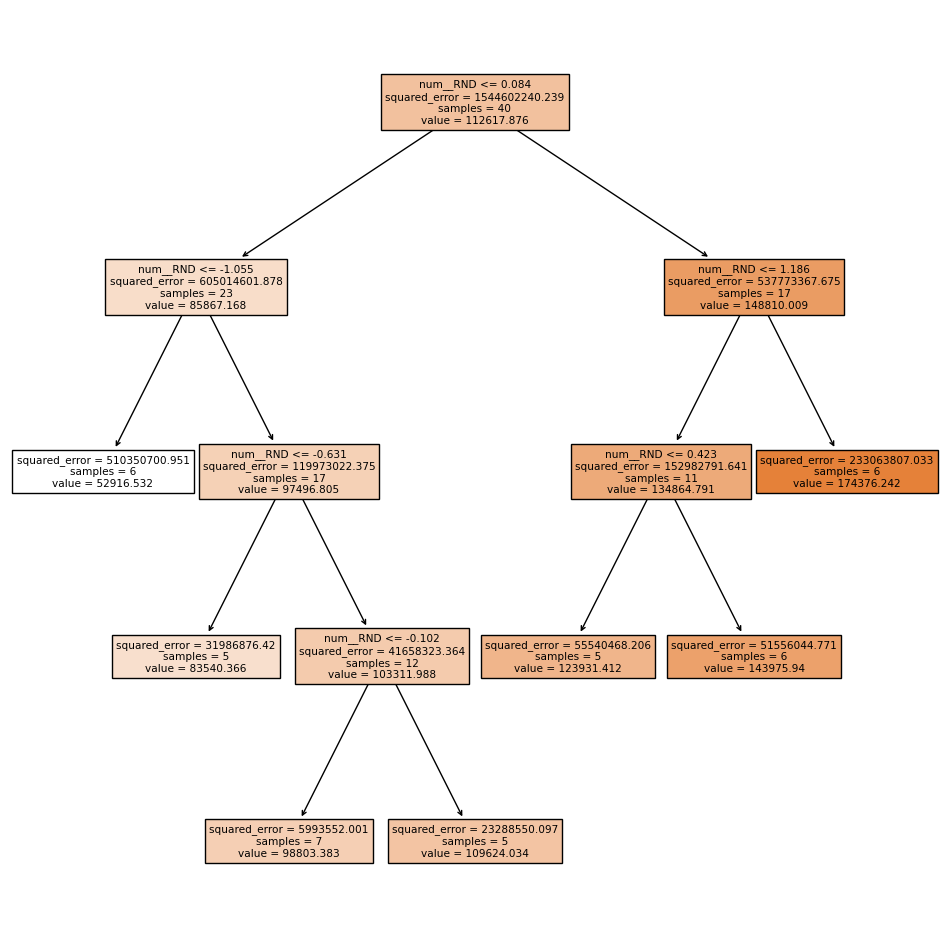

In [47]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(best_dtr, filled=True,feature_names=xtrain.columns)
plt.show()